In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
import sys
from pathlib import Path

# Agregar la carpeta raíz al path para poder importar
carpeta_raiz = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(carpeta_raiz))

# Importar las funciones
from funciones_save_load import guardar_parquet, cargar_parquet

# Usar las funciones
icfes = cargar_parquet("icfes_limpio.parquet")
icfes.sample(6)

,tipo_documento,nacionalidad,genero,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio,edad
460620,TI,Colombia,Femenino,No,Estrato 2,3 a 4,Dos,None,Primaria incompleta,Sector primario,Sector primario,No,No,No,No,No,Si,Si,No,11 a 25 libros,Todos o casi todos los días,3 a 5 veces por semana,Nunca o rara vez comemos eso,Igual,No leo por entretenimiento,Entre 30 y 60 minutos,Trabajo ocasional,Remuneración monetaria,Mixto,Oficial,A,No,Técnico/académico,Si,Urbano,Completa,Tunja,Boyaca,57,58,50,55,47.0,272,37.791308,1.0,1.0,17.0
262585,TI,Colombia,Masculino,No,Estrato 1,3 a 4,Cuatro,None,None,Trabajador independiente,Trabajador independiente,Si,Si,No,Si,No,No,No,No,11 a 25 libros,3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Peor,Entre 30 y 60 minutos,Más de 3 horas,None,Sin pago,Mixto,Oficial,A,No,Académico,Si,Urbano,Unica,Barranquilla,Atlantico,67,66,64,64,61.0,325,49.392049,2.0,3.0,17.0
209502,TI,Colombia,Masculino,No,Estrato 3,3 a 4,Tres,None,None,Trabajadores operativos,Trabajadores operativos,Si,Si,Si,Si,Si,Si,No,Si,11 a 25 libros,Todos o casi todos los días,3 a 5 veces por semana,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,No trabaja,No aplica,Mixto,No oficial,A,No,Académico,Si,Urbano,Completa,Bogotá d.c.,Bogotá,56,61,65,64,58.0,306,61.189472,3.0,3.0,17.0
119655,TI,Colombia,Femenino,No,Estrato 1,3 a 4,Dos,None,None,None,Sin actividad remunerada,Si,Si,Si,Si,No,No,No,No,11 a 25 libros,3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,No trabaja,No aplica,Mixto,No oficial,A,No,Académico,Si,Urbano,Mañana,Sincelejo,Sucre,60,52,54,56,57.0,278,51.349394,3.0,3.0,16.0
490430,CC,Colombia,Femenino,No,Estrato 3,3 a 4,Tres,None,Tecnico/Tecnologo,Sin informacion,Trabajadores operativos,Si,Si,Si,Si,Si,No,No,No,11 a 25 libros,Todos o casi todos los días,3 a 5 veces por semana,3 a 5 veces por semana,Peor,Entre 30 y 60 minutos,Entre 1 y 3 horas,No trabaja,No aplica,Mixto,No oficial,Otro,No,Técnico/académico,Si,Urbano,Mañana,Medellín,Antioquia,49,55,53,48,53.0,257,58.962901,3.0,2.0,20.0
389816,TI,Colombia,Masculino,No,Estrato 3,3 a 4,Dos,Primaria,Tecnico/Tecnologo,Microempresario,Profesionales,Si,Si,Si,Si,Si,Si,Si,Si,11 a 25 libros,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Mejor,No leo por entretenimiento,Entre 1 y 3 horas,No trabaja,No aplica,Mixto,No oficial,A,No,Académico,Si,Urbano,Completa,Bogotá d.c.,Bogotá,53,56,61,61,61.0,290,65.578146,4.0,4.0,17.0


## 1. Análisis de outliers

### 1.1 Outliers en variable objetivo

In [3]:
y = icfes['puntaje_global']
y_faltantes = y.isna().sum()

if  y_faltantes > 0:
    print(f'La variable objetivo tiene {y_faltantes} valores nulos')
else:
    print('La variable objetivo no tiene valores nulos')

print('-'*60)

print('Las estadísticas descriptivas de la variable objetivo son las siguientes:')
print(f"""
      La media es de: {y.mean().round(2)} puntos
      La mediana es de: {y.median()} puntos
      El valor mínimo es: {y.min()} puntos
      El valor máximo es: {y.max()} puntos
      La desviación estándar es de: {y.std().round(2)} puntos de la media
      La curtosis es de: {y.kurtosis().round(2)}
      """)

# Estudiantes con Cero en el ICFES
cantidad_cero = (icfes['puntaje_global'] == 0).sum()
print(f"Hay {cantidad_cero} estudiantes con puntaje global = 0")

# Estudiantes con 500 en el ICFES
cantidad_500 = (icfes['puntaje_global'] == 500).sum()
print(f"Hay {cantidad_500} estudiantes con puntaje global = 500")

La variable objetivo no tiene valores nulos
------------------------------------------------------------
Las estadísticas descriptivas de la variable objetivo son las siguientes:

      La media es de: 248.35 puntos
      La mediana es de: 245.0 puntos
      El valor mínimo es: 0 puntos
      El valor máximo es: 500 puntos
      La desviación estándar es de: 48.69 puntos de la media
      La curtosis es de: -0.12
      
Hay 80 estudiantes con puntaje global = 0
Hay 2 estudiantes con puntaje global = 500


Número de outliers detectados (|z| > 3): 1587
→ Se considera OUTLIER BAJO si el puntaje es menor a 102.3 puntos
→ Se considera OUTLIER ALTO si el puntaje es mayor a 394.4 puntos


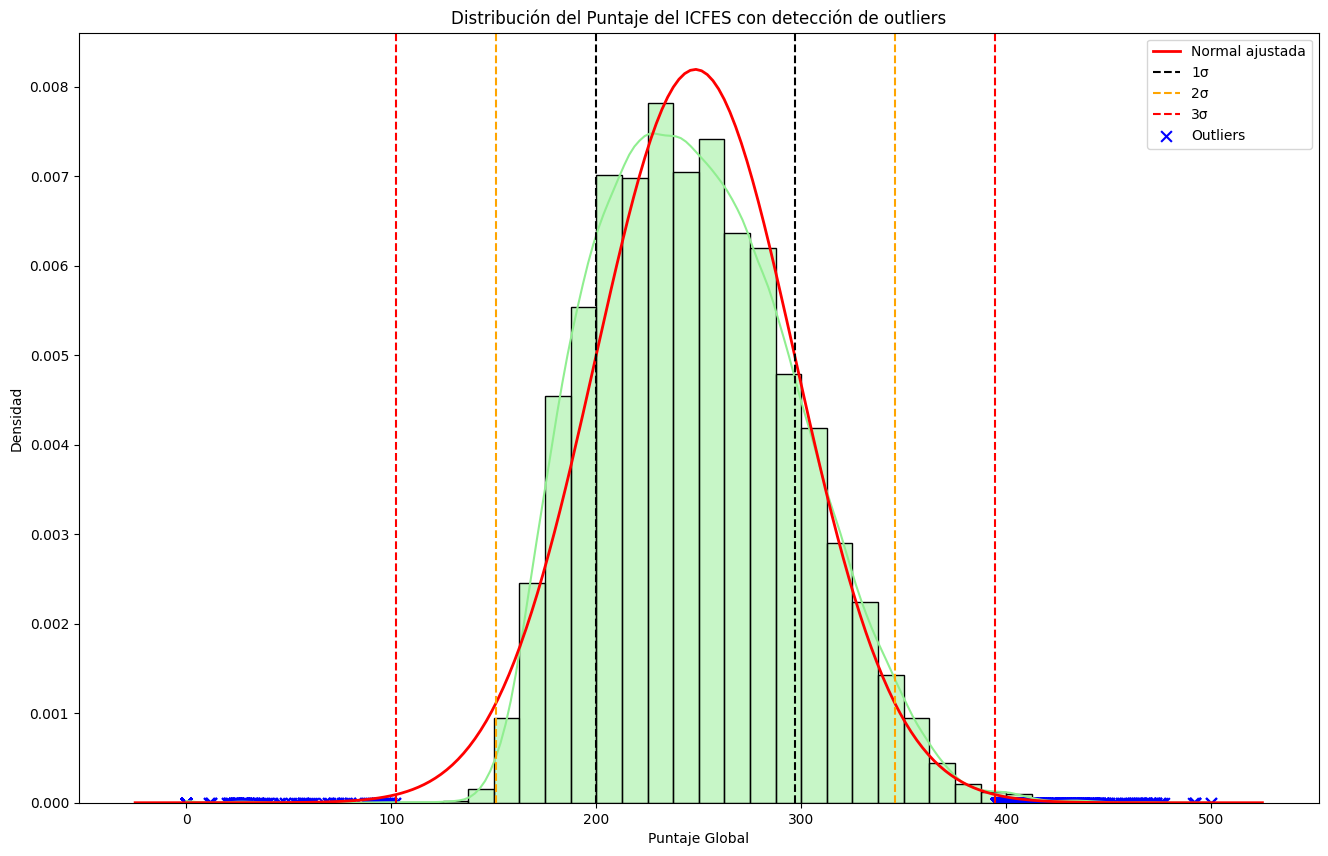

In [ ]:
from scipy.stats import norm

# Normalización (Z-score)
mu, sigma = y.mean(), y.std()
z_scores = (y - mu) / sigma

# Índices de los outliers (más allá de 3 desviaciones estándar)
outlier_idx = y.index[abs(z_scores) > 3]

# Crear DataFrame con índice, puntaje y z-score
df_outliers = pd.DataFrame({
    'indice': outlier_idx,
    'puntaje_global': y.loc[outlier_idx],
    'z_score': z_scores.loc[outlier_idx]
}).reset_index(drop=True)

# Ordenar por el valor del z-score
df_outliers = df_outliers.sort_values(by='z_score', ascending=False)

# Umbrales exactos de puntaje para ser considerado outlier
umbral_superior = mu + 3 * sigma
umbral_inferior = mu - 3 * sigma

print(f"Número de outliers detectados (|z| > 3): {len(df_outliers)}")
print(f"→ Se considera OUTLIER BAJO si el puntaje es menor a {umbral_inferior:.1f} puntos")
print(f"→ Se considera OUTLIER ALTO si el puntaje es mayor a {umbral_superior:.1f} puntos")


### Graficamos la distribución del puntaje en valores Z
plt.figure(figsize=(16,10))

# Histograma con KDE
sns.histplot(y, kde=True, stat="density", bins=40, color="lightgreen", edgecolor="black")

# Curva normal teórica
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', lw=2, label="Normal ajustada")

# Líneas verticales de 1σ, 2σ, 3σ
for k, col in zip([1,2,3], ["black","orange","red"]):
    plt.axvline(mu + k*sigma, color=col, linestyle="--")
    plt.axvline(mu - k*sigma, color=col, linestyle="--", label=f"{k}σ")

# Graficar puntos outliers
plt.scatter(y.loc[outlier_idx], [0]*len(outlier_idx),
            color="blue", marker="x", s=60, label="Outliers")

plt.title("Distribución del Puntaje del ICFES con detección de outliers")
plt.xlabel("Puntaje Global")
plt.ylabel("Densidad")
plt.legend()
plt.show()

<Figure size 1400x900 with 0 Axes>

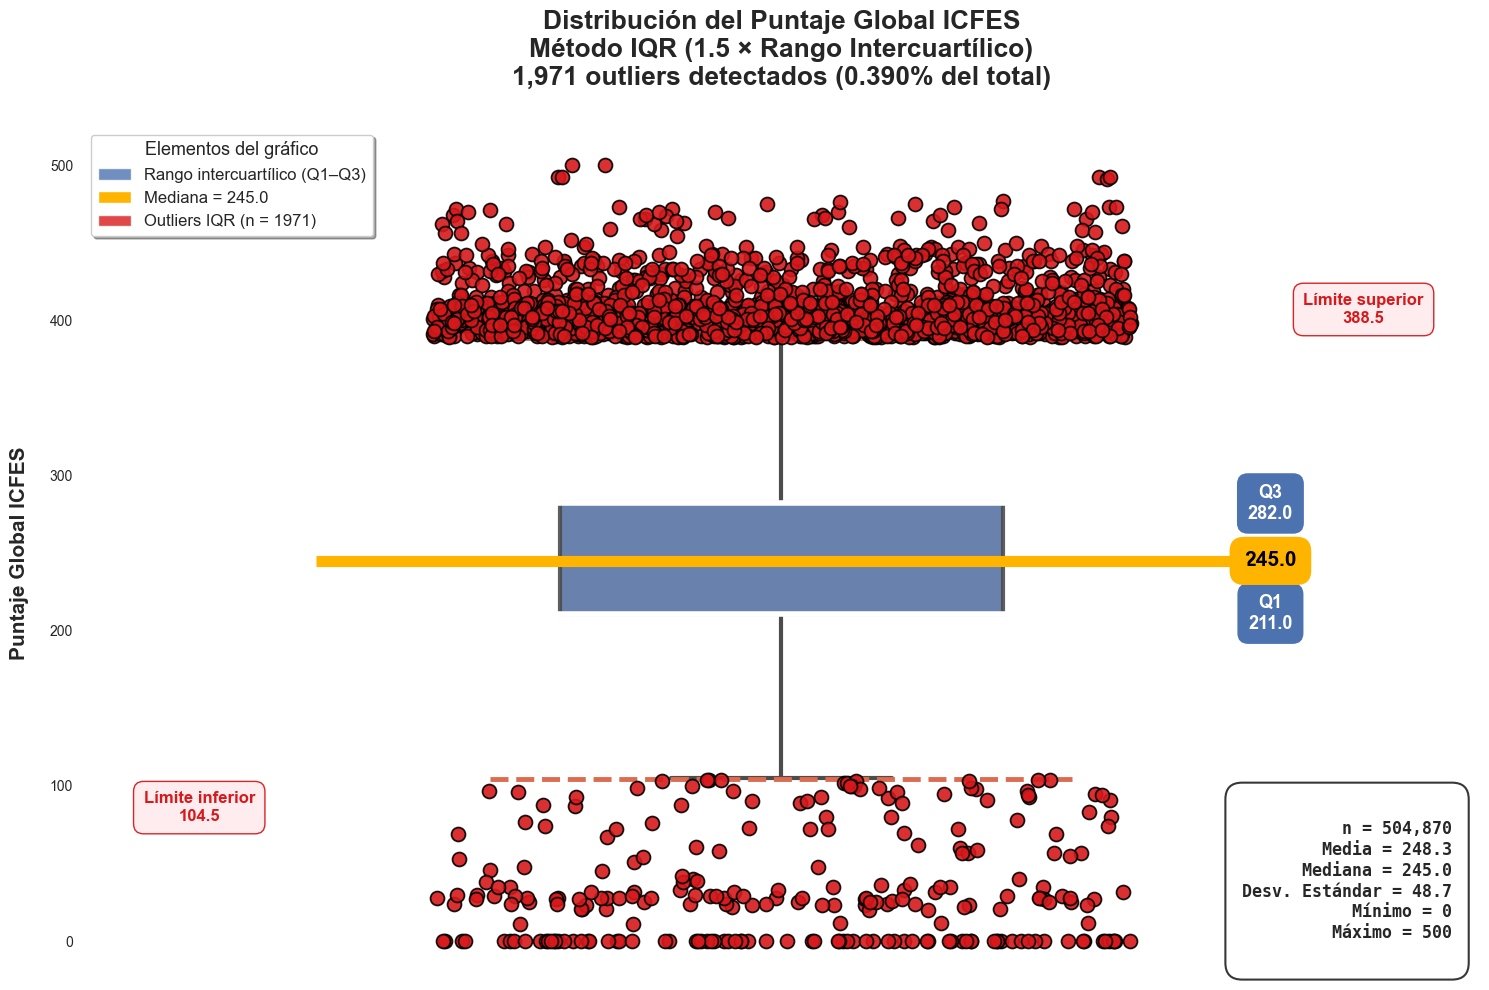

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración estética tipo Nature / Science
plt.figure(figsize=(14, 9))
sns.set_style("white")
sns.set_palette("husl")

# Datos
data = icfes['puntaje_global']

# Calcular IQR y límites
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Outliers
outliers = data[(data < lim_inf) | (data > lim_sup)]

import matplotlib.pyplot as plt
import seaborn as sns

# =============================================
# GRÁFICO FINAL DEFINITIVO - BOXPLOT ICFES
# =============================================
plt.figure(figsize=(15, 10))
sns.set_style("white")

data = icfes['puntaje_global']
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
outliers = data[(data < lim_inf) | (data > lim_sup)]
mediana = data.median()

# Boxplot principal (sin outliers para control total)
sns.boxplot(y=data, width=0.38, color="#4c72b0", linewidth=3,
            fliersize=0, boxprops=dict(alpha=0.9), medianprops=dict(color="white", linewidth=0))

# Outliers resaltados con stripplot
sns.stripplot(y=outliers, color="#d7191c", size=10, jitter=0.3, alpha=0.9,
              edgecolor="black", linewidth=1.3)

# Bigotes y límites manuales
plt.hlines([Q1, Q3], -0.4, 0.4, color="white", linewidth=4)
plt.hlines([lim_inf, lim_sup], -0.25, 0.25, color="#dd6b4f", linestyle="--", linewidth=3.5)

# Mediana destacada
plt.hlines(mediana, -0.4, 0.4, color="#ffb400", linewidth=8, zorder=10)

# =============================================
# ETIQUETAS CLAVE (posicionadas perfectamente)
# =============================================
plt.text(0.42, Q1, f'Q1\n{Q1:.1f}', fontsize=13, fontweight='bold', color='white',
         ha='center', va='center', bbox=dict(facecolor='#4c72b0', edgecolor='none', boxstyle='round,pad=0.6'))

plt.text(0.42, Q3, f'Q3\n{Q3:.1f}', fontsize=13, fontweight='bold', color='white',
         ha='center', va='center', bbox=dict(facecolor='#4c72b0', edgecolor='none', boxstyle='round,pad=0.6'))

plt.text(0.42, mediana, f'{mediana:.1f}', fontsize=15, fontweight='bold', color='black',
         ha='center', va='center', bbox=dict(facecolor='#ffb400', edgecolor='none', boxstyle='round,pad=0.7'))

# Límites IQR
plt.text(-0.5, lim_inf - 8, f'Límite inferior\n{lim_inf:.1f}', fontsize=12, fontweight='bold',
         color='#d7191c', ha='center', va='top',
         bbox=dict(facecolor='#ffebee', edgecolor='#d7191c', boxstyle='round,pad=0.6', alpha=0.95))

plt.text(0.5, lim_sup + 8, f'Límite superior\n{lim_sup:.1f}', fontsize=12, fontweight='bold',
         color='#d7191c', ha='center', va='bottom',
         bbox=dict(facecolor='#ffebee', edgecolor='#d7191c', boxstyle='round,pad=0.6', alpha=0.95))

# =============================================
# TÍTULO Y ESTADÍSTICAS
# =============================================
plt.title("Distribución del Puntaje Global ICFES\n"
          "Método IQR (1.5 × Rango Intercuartílico)\n"
          f"{len(outliers):,} outliers detectados ({len(outliers)/len(icfes):.3%} del total)",
          fontsize=19, fontweight='bold', pad=30)

# Estadísticas destacadas (caja bonita y visible)
stats_text = f"""
n = {len(icfes):,}
Media = {data.mean():.1f}
Mediana = {mediana:.1f}
Desv. Estándar = {data.std():.1f}
Mínimo = {data.min():.0f}
Máximo = {data.max():.0f}
"""
plt.text(0.98, 0.02, stats_text, transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor='#333333', boxstyle='round,pad=1', linewidth=1.5, alpha=0.98),
         family='monospace')

# =============================================
# LEYENDA Y ESTÉTICA FINAL
# =============================================
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#4c72b0', alpha=0.8, label='Rango intercuartílico (Q1–Q3)'),
    Patch(facecolor='#ffb400', label=f'Mediana = {mediana:.1f}'),
    Patch(facecolor='#d7191c', alpha=0.8, label=f'Outliers IQR (n = {len(outliers)})')
]
plt.legend(handles=legend_elements, title="Elementos del gráfico", title_fontsize=13,
           fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True, facecolor='white')

plt.ylabel("Puntaje Global ICFES", fontsize=15, fontweight='bold', labelpad=15)
plt.xlabel("")
plt.xticks([])

sns.despine(left=True, bottom=True)
plt.xlim(-0.6, 0.6)
plt.tight_layout()
plt.show()

Outliers detectados con Isolation Forest: 1900 (0.376%)


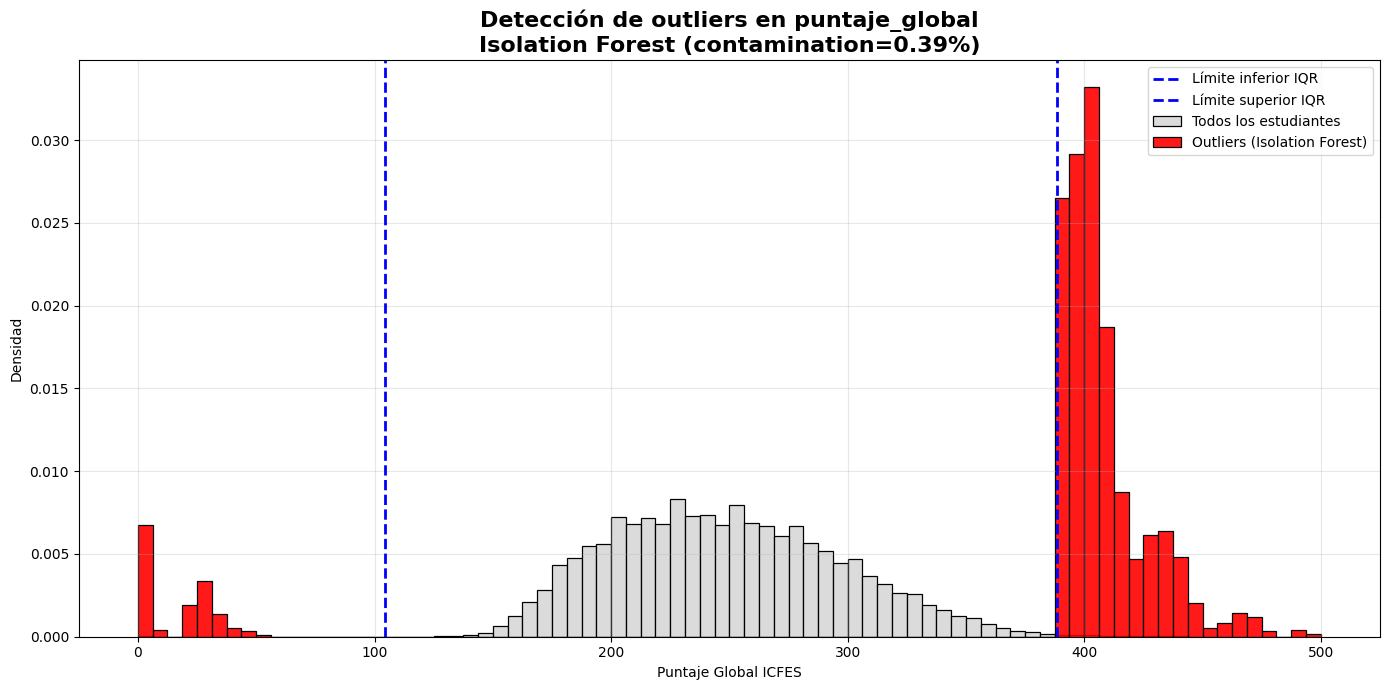

In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------------------------------------
# 1. Isolation Forest
# --------------------------------------------------
X = icfes[['puntaje_global']]

iso = IsolationForest(
    contamination=0.0039,   # ← el 0.39% que dio IQR (el más robusto)
    n_estimators=200,
    random_state=42,
    max_samples='auto'
).fit(X)

# Predicción: -1 = outlier, 1 = normal
icfes['outlier_if'] = iso.predict(X) == -1

print(f"Outliers detectados con Isolation Forest: {icfes['outlier_if'].sum()} "
      f"({icfes['outlier_if'].mean():.3%})")

# --------------------------------------------------
# 2. GRÁFICO
# --------------------------------------------------
plt.figure(figsize=(14, 7))

# Histograma completo
sns.histplot(data=icfes, x='puntaje_global', bins=80, color='lightgray', 
             alpha=0.8, label='Todos los estudiantes', stat='density')

# Outliers en rojo intenso
sns.histplot(data=icfes[icfes['outlier_if']], x='puntaje_global', bins=80,
             color='red', alpha=0.9, label='Outliers (Isolation Forest)', stat='density')

# Líneas verticales de los límites IQR para referencia
plt.axvline(104.5, color='blue', linestyle='--', linewidth=2, label='Límite inferior IQR')
plt.axvline(388.5, color='blue', linestyle='--', linewidth=2, label='Límite superior IQR')

plt.title('Detección de outliers en puntaje_global\nIsolation Forest (contamination=0.39%)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Puntaje Global ICFES')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()